***
[1-1-1] 影像基礎：
====

以OpenCV2所讀取圖片的piexl排序是BGR，如果我們想顯示出正確的顏色，必須轉成透過 'cv2.COLOR_BGR2RGB' 轉成RGB

RGB轉換成Gray 公式:RGB[A] to Gray:Y←0.299⋅R+0.587⋅G+0.114⋅B

來源:
https://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html

如果有灰階圖，使用“plt.imshow(images[i],'gray')”，請記得在後面加上'gray，否則不會顯示實際的灰階顏色

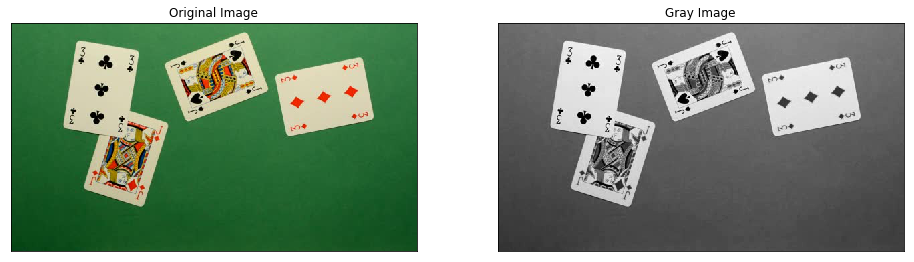

In [10]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
######BGR轉RGB

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
######BGR轉灰階


titles = ['Original Image','Gray Image']
images = [image, image_gray]
plt.figure(figsize=(16,16))
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
#     plt.subplot(2,2,i+2),plt.imshow(images[i],'gray')

    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

***
[1-1-2] 影像基礎：平移
====


type(image)= <class 'numpy.ndarray'>
image.shape= (342, 608, 3)


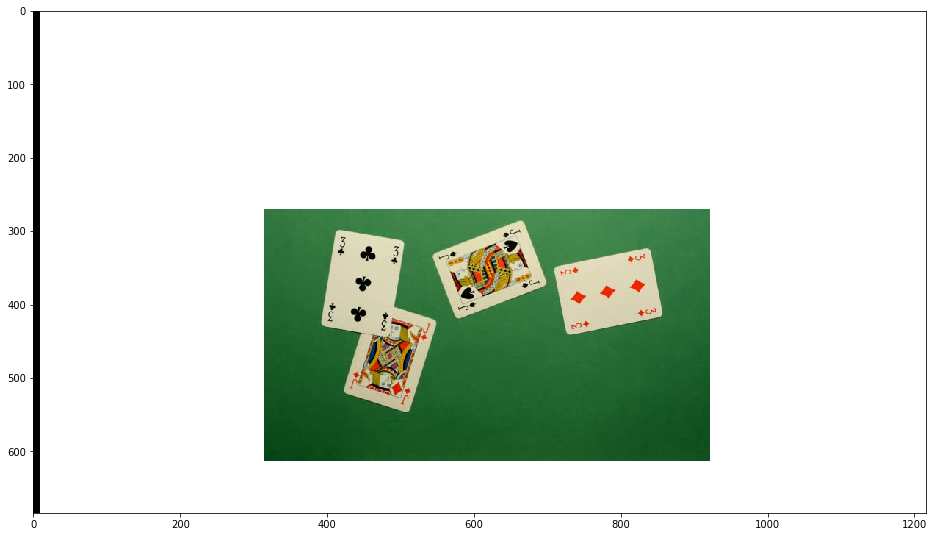

In [12]:
image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('type(image)=', type(image))
print('image.shape=', image.shape)
canvas = np.zeros((image.shape[0]*2, image.shape[1]*2,3), np.uint8) + 255
#put loaded image into the larger canvas

x_offset = canvas.shape[1] // 2 - image.shape[1] // 2
y_offset = canvas.shape[0] // 2 - image.shape[0] // 2 +100

canvas[y_offset:y_offset+image.shape[0], x_offset:x_offset+image.shape[1]] = image

M = np.float32([[1,0,10],[0,1,0]])
shifted = cv2.warpAffine(canvas,M,(canvas.shape[1],canvas.shape[0]))


plt.figure(figsize=(16,16))
plt.imshow(shifted)
plt.show()

***
[1-1-3] 影像基礎：旋轉
====


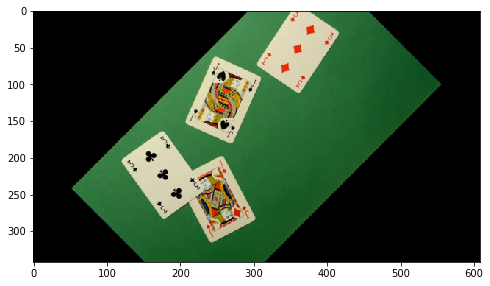

In [3]:
image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(h,w) = image.shape[:2]
center = (w / 2,h / 2)
M = cv2.getRotationMatrix2D(center,45,0.75)
rotated = cv2.warpAffine(image,M,(w,h))

plt.figure(figsize=(8,8))
plt.imshow(rotated)
plt.show()

***
[1-1-4] 影像基礎：翻轉
====


<Figure size 576x576 with 0 Axes>

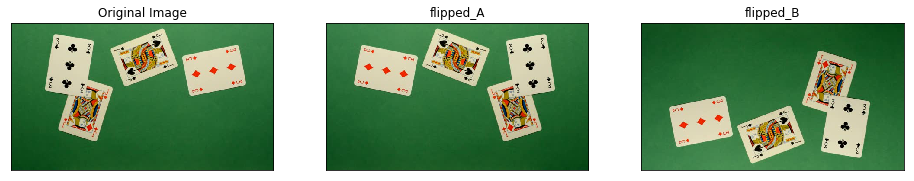

In [4]:
image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
flipped_A = cv2.flip(image,1)
flipped_B = cv2.flip(image,-1)


plt.figure(figsize=(8,8))



titles = ['Original Image','flipped_A','flipped_B']
images = [image,flipped_A, flipped_B]
plt.figure(figsize=(16,16))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

***
[1-1-5] 影像基礎：圖像上畫出 bounding box
====


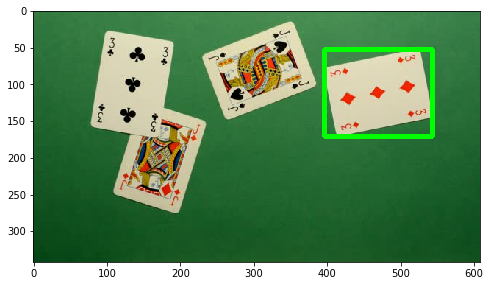

In [5]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


x, y, w, h = 396,53,147,118
cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)
 


plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

***
[1-2]小技巧：
====
灰階圖的每個pixel只有用一個數字表達，也就是一個chanel，在未來如果進行Transfer learning所使用到的是3個chanel，RGB的輸入時，可以將灰階的pixel堆疊成三份，這樣就與原本RGB三個chanel擁有一樣的輸入格式。

＊Transfer learning在往後的課程將會說明。

Before(image_gray shape): (342, 608) 

After (gray2RGB shape): (342, 608, 3) 



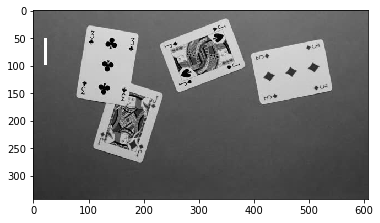

In [15]:
image_gray[50:100,20:26] = 255
gray2RGB = image_gray.reshape(image_gray.shape[0]*image_gray.shape[1],1)
temp = np.hstack((gray2RGB,gray2RGB))
gray2RGB = np.hstack((temp,gray2RGB))
gray2RGB = gray2RGB.reshape((image_gray.shape[0],image_gray.shape[1],3))


print('Before(image_gray shape): %s \n'  %(str(image_gray.shape)))
print('After (gray2RGB shape): %s \n'  %(str(gray2RGB.shape)))
plt.imshow(gray2RGB)

(2, 3)


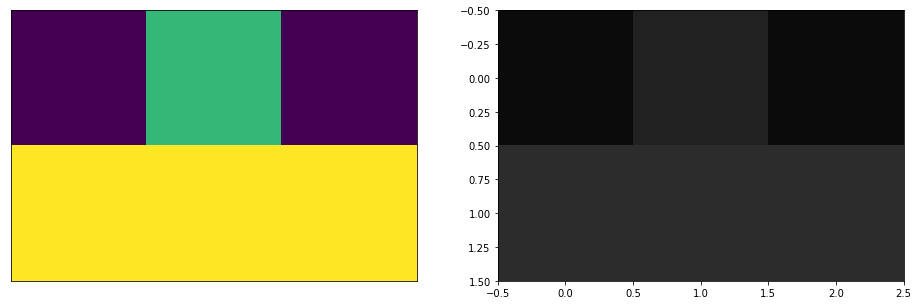

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

a = np.array([[11,33,11],[44,44,44]])
print(a.shape)
plt.subplot(1,2,1)
plt.imshow(a)
plt.xticks([]),plt.yticks([])
a = a.reshape(6,1)
t = np.hstack((a,a))
a = np.hstack((t,a))
a = a.reshape(2,3,3)
plt.subplot(1,2,2)
plt.imshow(a)

***
[1-3]：
====

觀察一個灰階的chanel與重疊三個chanel差異，'plt.imshow'這邊沒有加上'gray'

image_gray.shape= (342, 608)
gray2RGB.shape= (342, 608, 3)


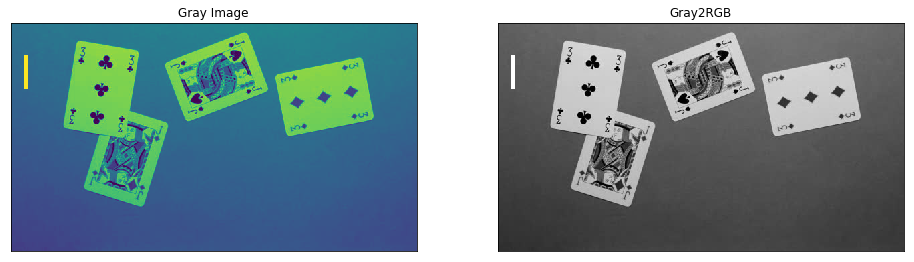

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)

image = gray2RGB
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



titles = ['Gray Image','Gray2RGB']
print('image_gray.shape=',image_gray.shape)
print('gray2RGB.shape=',gray2RGB.shape)
images = [image_gray,gray2RGB ]
plt.figure(figsize=(16,8))
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In CV single channel np array won't really be shown as gray scale image. need keyword 'gray' in plt.imshow. if duplicating the single channel data to 3 and stack them together, then it will be a "color" image that looks like gray scale image because at each point the value of different channel is the same

***
[2]Threshold：
====
設定門檻值，讓灰階可以黑白分明，以下為各種不同函式的表現，可以觀察原圖與所使用的函式差異。


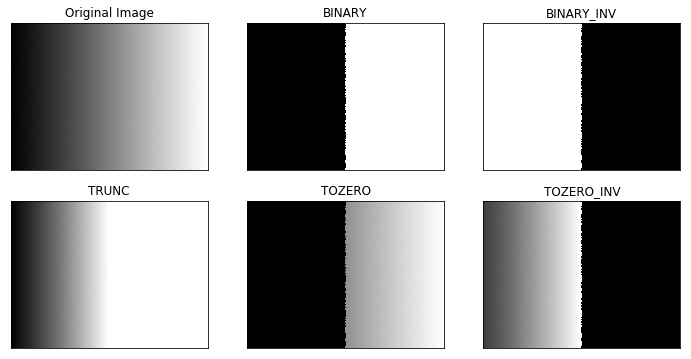

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('bw.jpg',0)
(h, w) = image.shape[:2]
center = (w/2, h/2)
M = cv2.getRotationMatrix2D(center, 270, 2)
rotated = cv2.warpAffine(image, M, (w, h))
img = rotated

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


***
[3-1]加入椒鹽雜訊
====



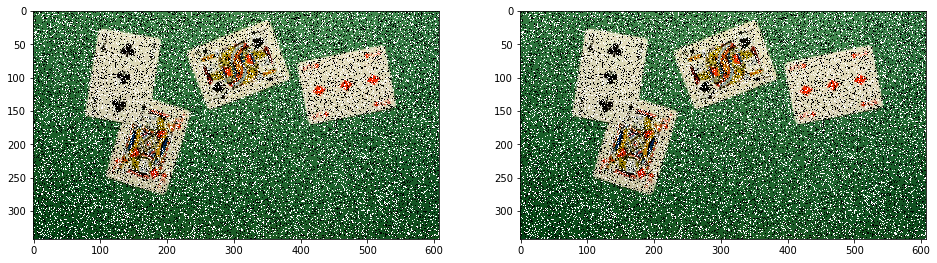

In [46]:
import cv2
from numpy import random
from numpy import shape
from matplotlib import pyplot as plt


image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = image 

def PepperandSalt(src,percetage):
    NoiseImg=src
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(NoiseNum):
        # random_integers(a,b) == randit(a,b+1)!!!
        randX=random.randint(0,src.shape[0])
        randY=random.randint(0,src.shape[1])
        if random.randint(0,2)<=0.5:
            NoiseImg[randX,randY]=0
        else:
            NoiseImg[randX,randY]=255          
    return NoiseImg 

img_noise=PepperandSalt(img,0.3)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ax=plt.imshow(image)  

plt.subplot(1,2,2)
ax=plt.imshow(img_noise)


***
[3-2]將有椒鹽雜訊的圖片使用各種模糊演算法處理
====

[blur](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=blur#cv2.blur)

[GaussianBlur](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=blur#cv2.GaussianBlur)


[medianBlur](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=blur#cv2.medianBlur)


[bilateralFilter](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=blur#cv2.bilateralFilter)




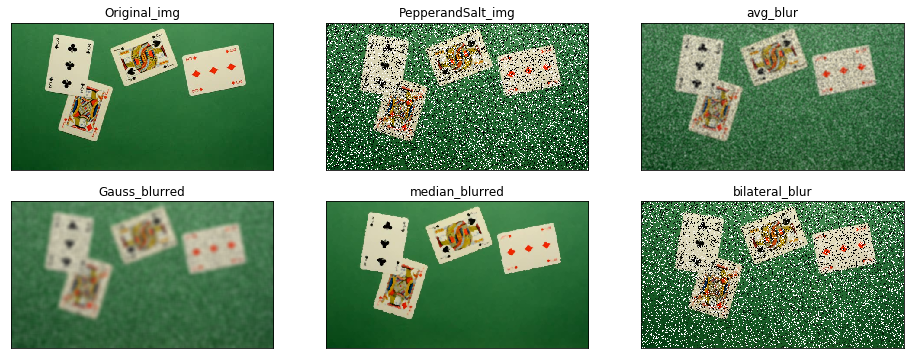

In [10]:
image_Or = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image_Or = cv2.cvtColor(image_Or, cv2.COLOR_BGR2RGB)

avg_blur = cv2.blur(image,(5,5))
Gauss_blurred = cv2.GaussianBlur(image, (15,15), 5)
median_blurred = cv2.medianBlur(image,5)
bilateral_blur = cv2.bilateralFilter(image,9,75,75)


titles = ['Original_img','PepperandSalt_img','avg_blur','Gauss_blurred','median_blurred','bilateral_blur']
images = [image_Or,img_noise, avg_blur, Gauss_blurred, median_blurred, bilateral_blur]
plt.figure(figsize=(16,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

***
[4]影像金字塔 Image pyramid
====
主要功能是可以從不同的解析度來發現到圖像的特性，有時候在低解析度在圖像分辨上，反而不會被太多影像細節所干涉，而在卷積類神經網路中，有些演算法也有加入此概念。


[Pyramid (image processing) WIKI](https://en.wikipedia.org/wiki/Pyramid_(image_processing))


[cv2.pyrDown](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.pyrdown#cv2.pyrDown)






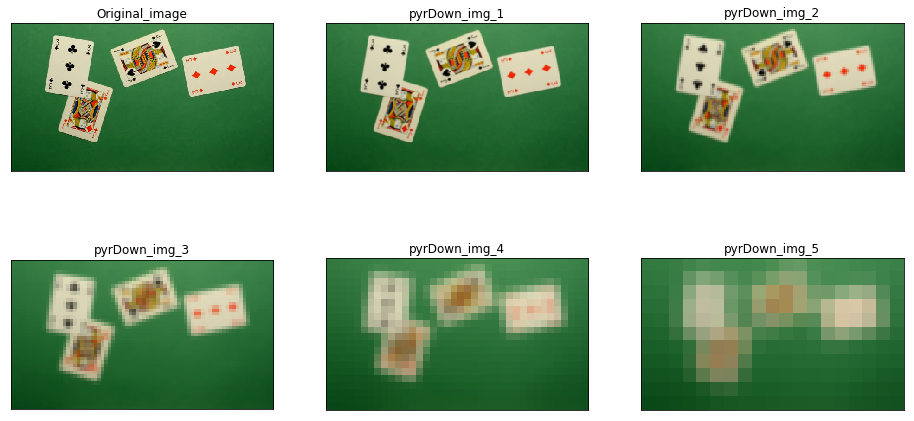

In [11]:
import cv2
from numpy import random
from numpy import shape
from matplotlib import pyplot as plt


Original_image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
Original_image = cv2.cvtColor(Original_image, cv2.COLOR_BGR2RGB)

pyrDown_img_1 = cv2.pyrDown(Original_image)
pyrDown_img_2 = cv2.pyrDown(pyrDown_img_1)
pyrDown_img_3 = cv2.pyrDown(pyrDown_img_2)
pyrDown_img_4 = cv2.pyrDown(pyrDown_img_3)
pyrDown_img_5 = cv2.pyrDown(pyrDown_img_4)


titles = ['Original_image','pyrDown_img_1','pyrDown_img_2','pyrDown_img_3','pyrDown_img_4','pyrDown_img_5']
images = [Original_image, pyrDown_img_1, pyrDown_img_2, pyrDown_img_3, pyrDown_img_4, pyrDown_img_5]

plt.figure(figsize=(16,8))

for i in range(6):
    
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()




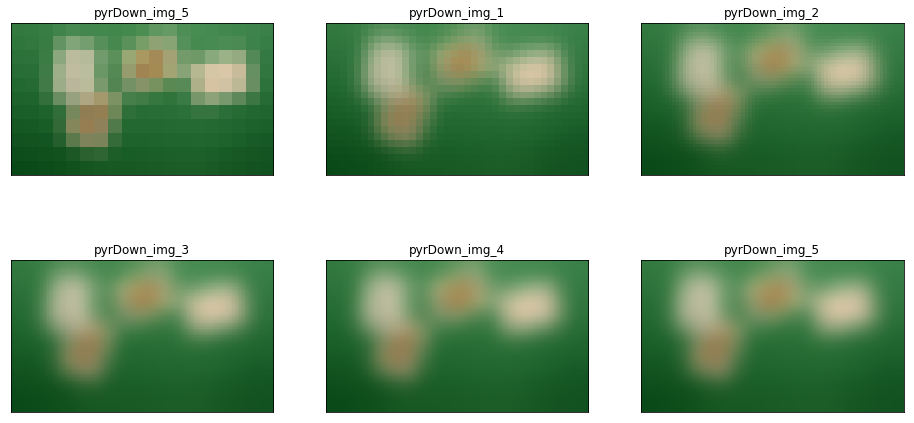

In [12]:
pyrUp_img_1 = cv2.pyrUp(pyrDown_img_5)
pyrUp_img_2 = cv2.pyrUp(pyrUp_img_1)
pyrUp_img_3 = cv2.pyrUp(pyrUp_img_2)
pyrUp_img_4 = cv2.pyrUp(pyrUp_img_3)
pyrUp_img_5 = cv2.pyrUp(pyrUp_img_4)


titles = ['pyrDown_img_5','pyrDown_img_1','pyrDown_img_2','pyrDown_img_3','pyrDown_img_4','pyrDown_img_5']
images = [pyrDown_img_5,pyrUp_img_1, pyrUp_img_2, pyrUp_img_3, pyrUp_img_4, pyrUp_img_5]
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

***
[5-1]使用CV2的“findContours”找到圖像中物體的輪廓
====

[cv2.findContours](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.findcontours#cv2.findContours)

[cv2.drawContours](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.drawcontours#cv2.drawContours)

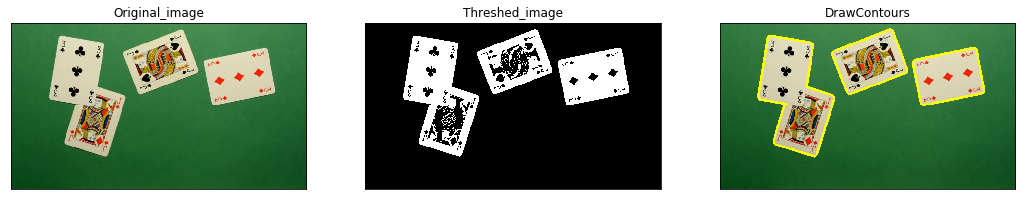

In [13]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

Original_image_A = cv2.imread('poker.jpg', cv2.IMREAD_UNCHANGED)
Original_image_A = cv2.cvtColor(Original_image_A , cv2.COLOR_BGR2RGB) 

Original_image_B = cv2.imread('poker.jpg', cv2.IMREAD_UNCHANGED)
Original_image_B = cv2.cvtColor(Original_image_B, cv2.COLOR_BGR2RGB) 
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(Original_image_B, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
# find contours and get the external one
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL,
                cv2.CHAIN_APPROX_SIMPLE)
 
cv2.drawContours(Original_image_B, contours, -1, (255, 255, 0), 3)


titles = ['Original_image','Threshed_image','DrawContours']
images = [Original_image_A,threshed_img,Original_image_B]


plt.figure(figsize=(18,9))
plt.imshow(Original_image_B)

for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

***
[5-2]承上列，利用不同的方框繪製方式
====

下列左邊是以原圖以Threshold調整過再找輪廓，而右邊的圖片則是再加以高斯模糊處理後再找輪廓


[cv2.rectangle](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.rectangle#cv2.rectangle)

[cv2.drawContours](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.drawcontours#cv2.drawContours)

[cv2.circle](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.rectangle#cv2.circle)


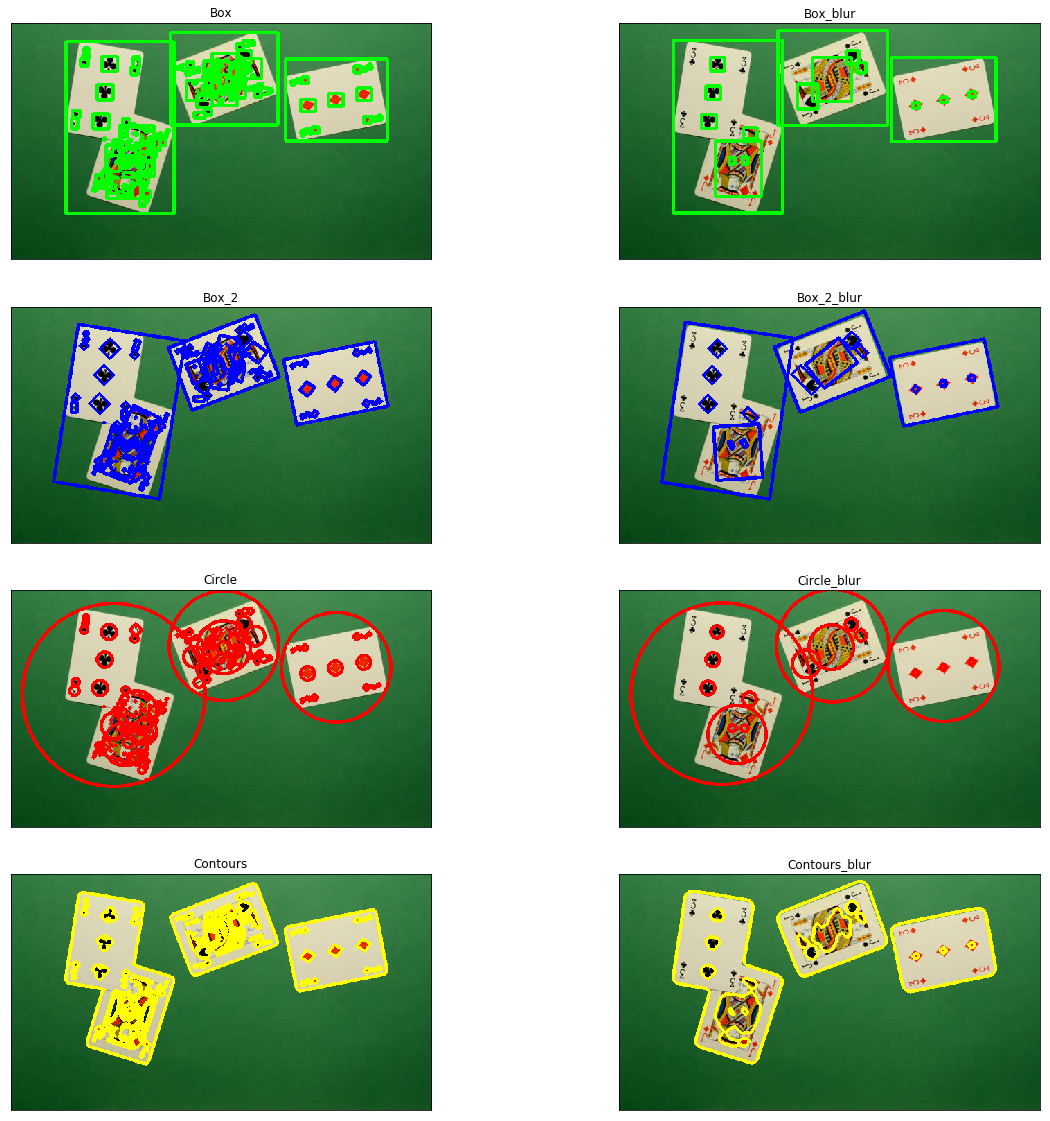

In [14]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt


img = cv2.imread('poker.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in range(4):
    for a in range(2):
        locals()['img_{}{}'.format(i+1,a+1)]= cv2.imread('poker.jpg', cv2.IMREAD_UNCHANGED)
        locals()['img_{}{}'.format(i+1,a+1)]= cv2.cvtColor(locals()['img_{}{}'.format(i+1,a+1)], cv2.COLOR_BGR2RGB)

img_g = cv2.GaussianBlur(img, (15,15), 5)

for a in range(2):

# threshold image
    if a == 0:
        ret, threshed_img = cv2.threshold(cv2.cvtColor(img_11, cv2.COLOR_RGB2GRAY),
                        127, 255, cv2.THRESH_BINARY)
    if a == 1:
        ret, threshed_img = cv2.threshold(cv2.cvtColor(img_g, cv2.COLOR_RGB2GRAY),
                        127, 255, cv2.THRESH_BINARY)

    # find contours and get the external one
    image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
                    cv2.CHAIN_APPROX_SIMPLE)

    # with each contour, draw boundingRect in green
    # a minAreaRect in red and
    # a minEnclosingCircle in blue

    for c in contours:
        # get the bounding rect
        x, y, w, h = cv2.boundingRect(c)
        
        #第一組圖
        # draw a green rectangle to visualize the bounding rect
        cv2.rectangle(locals()['img_1{}'.format(a+1)], (x, y), (x+w, y+h), (0, 255, 0), 3)

        # get the min area rect
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        
        # convert all coordinates floating point values to int
        box = np.int0(box)
        
        #第二組圖
        # draw a red 'nghien' rectangle
        cv2.drawContours(locals()['img_2{}'.format(a+1)], [box], 0, (0, 0, 255),3)

        # finally, get the min enclosing circle
        (x, y), radius = cv2.minEnclosingCircle(c)
        
        # convert all values to int
        center = (int(x), int(y))
        radius = int(radius)
        
        #第三組圖
        # and draw the circle in blue
        cv2.circle(locals()['img_3{}'.format(a+1)], center, radius, (255, 0, 0), 3)
    #第四組圖
    cv2.drawContours(locals()['img_4{}'.format(a+1)], contours, -1, (255, 255, 0), 3)


titles = ['Box','Box_blur','Box_2','Box_2_blur','Circle','Circle_blur','Contours','Contours_blur']
images = [img_11, img_12,img_21,img_22,img_31,img_32,img_41,img_42]
plt.figure(figsize=(20,20))
for i in range(8):
    plt.subplot(4,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


***
[6]利用CascadeClassifier進行臉部捕捉
====

[cv2.CascadeClassifier](https://docs.opencv.org/3.0-beta/modules/objdetect/doc/cascade_classification.html?highlight=cv2.cascadeclassifier#)


Paper : [Empirical Analysis of Detection Cascades of Boosted Classifiers for Rapid Object
Detection](http://www.multimedia-computing.de/mediawiki//images/5/52/MRL-TR-May02-revised-Dec02.pdf)

In [15]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

#讀取眼睛與臉部的已經學習後的分類器
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"/haarcascade_eye.xml")


image = cv2.imread('Einstein.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=(8,8))
plt.imshow(image)

AttributeError: module 'cv2' has no attribute 'data'


***
[7]觀察圖像中pixel的成分分佈
====

[cv2.bitwise_and](https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html?highlight=cv2.bitwise_and#cv2.bitwise_and)

[cv2.calcHist](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/histograms.html?highlight=cv2.calchist#cv2.calcHist)




In [ ]:
img = cv2.imread('Einstein.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create a mask
mask_1 = np.zeros(img.shape[:2], np.uint8)
mask_2 = np.zeros(img.shape[:2], np.uint8)

mask_1[100:400, 100:600] = 255
mask_2[150:250, 200:400] = 255
masked_img_1 = cv2.bitwise_and(img,img,mask = mask_1)


masked_img_2 = cv2.bitwise_and(img,img,mask = mask_2)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask_1 = cv2.calcHist([img],[0],mask_1,[256],[0,256])
hist_mask_2 = cv2.calcHist([img],[0],mask_2,[256],[0,256])


plt.figure(figsize=(12,12))

plt.subplot(421), plt.imshow(img, 'gray')
plt.subplot(423), plt.imshow(mask_1,'gray')
plt.subplot(424), plt.imshow(masked_img_1, 'gray')
plt.subplot(425), plt.imshow(mask_2,'gray')
plt.subplot(426), plt.imshow(masked_img_2, 'gray')

plt.subplot(427), plt.plot(hist_full), plt.plot(hist_mask_1) , plt.plot(hist_mask_2)
plt.xlim([0,256])

plt.show()

***
[8]影像處理技巧:
====

在下面的範例開始前，先加入椒鹽雜訊




In [ ]:
import numpy as np
import cv2
from numpy import random
from numpy import shape
from matplotlib import pyplot as plt

image = cv2.imread('5z.png',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def PepperandSalt(src,percetage):
    NoiseImg=src
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(NoiseNum):
        randX=random.random_integers(0,src.shape[0]-1)
        randY=random.random_integers(0,src.shape[1]-1)
        if random.random_integers(0,1)<=0.5:
            NoiseImg[randX,randY]=255
        else:
            NoiseImg[randX,randY]=255          
    return NoiseImg 


NoiseImage=PepperandSalt(image,0.05)
plt.imshow(NoiseImage)   



[9-1]影像處理技巧:
====
膨脹(dilation)、侵蝕(erosion)、斷開(opening)、閉合(closing )、gradient

觀察這些技巧對於實際圖片的影響意義

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


kernel = np.ones((3,3),np.uint8)
image = NoiseImage


dilation = cv2.dilate(image,kernel,iterations = 1)
erosion = cv2.erode(image,kernel,iterations = 35)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)


titles = ['Original_img','dilation','erosion','opening','closing','gradient']
images = [image,dilation,erosion,opening,closing,gradient]


plt.figure(figsize=(14,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


[9-2]影像處理技巧:
====
用一般沒有雜訊正常的圖來試試看有什麼效果吧

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


kernel = np.ones((3,3),np.uint8)
image = cv2.imread('poker.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

dilation = cv2.dilate(image,kernel,iterations = 1)
erosion = cv2.erode(image,kernel,iterations = 35)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)


titles = ['Original_img','dilation','erosion','opening','closing','gradient']
images = [image,dilation,erosion,opening,closing,gradient]


plt.figure(figsize=(14,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

***
[10-1]簡單的影像觀念:
====
影像是由每張圖片連續快速的交換所構成，每張圖片稱為frame，而每秒有幾張圖片稱為frames per second(FPS)，一般FPS達到24以上時，肉眼會感覺不到差異。

In [ ]:
from IPython.display import HTML

HTML("""
<video width="480" height="360" controls>
  <source src="video.mp4" type="video/mp4">
</video>
""")

***
[10-2]Frames Per Second(FPS)
====
透過以下的程式碼，可以觀察到這個影片每秒有幾個frame。

In [ ]:
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64
from matplotlib import pyplot as plt
import signal
import time
 

vc =  cv2.VideoCapture("video.mp4")
fps = vc.get(cv2.CAP_PROP_FPS)
print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

***
[10-3]JupyterLab無法使用cv2所提供的函示顯示圖片以及影像
====
這邊使用“bokeh”方式來播放出影片

In [ ]:
current_time = 0
counter = 0
def processImg(img):
    global counter 
    global current_time
    if current_time == 0:
        current_time = time.time()
    else:
        last_time = current_time
        current_time = time.time()
        fps = 1. / (current_time - last_time)
        text = "FPS: %d" % int(fps)
        counter = counter +1
        counter_text = "Frame Number: %d" % int(counter)
        
        #cv2.putText(img, text , (0,100), cv2.FONT_HERSHEY_TRIPLEX, 3, (255, 0, 0), 2)
        cv2.putText(img, counter_text , (0,80), cv2.FONT_HERSHEY_TRIPLEX, 3, (255, 0, 0), 2)
        
    return img


from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import cv2
import time
output_notebook()

cap = cv2.VideoCapture("video.mp4")
ret, frame = cap.read()
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=600, height=360)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)
while True:
    ret, frame = cap.read()
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame = processImg(frame)
    frame=cv2.flip(frame, -1)
    frame=cv2.flip(frame, 1)
    
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(0.8)#改變此數值可以影響顯示的間隔

***
[10-4]將影片拆成每個Frame依序顯示出來
====

In [ ]:
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64
from matplotlib import pyplot as plt
import signal
import time

vc =  cv2.VideoCapture("video.mp4")

plt.ion()
if vc.isOpened(): # try to get the first frame
    plt.figure(figsize=(10,5))
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    plt.xticks([])
    plt.yticks([])
    preview = plt.imshow(frame)
    time.sleep(0.5)
    clear_output()
    
else:
    is_capturing = False

#signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False

while is_capturing:

    plt.figure(figsize=(10,5))
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    preview.set_data(frame)  
    plt.draw()
    plt.xticks([])
    plt.yticks([]) 
    plt.imshow(frame)
    time.sleep(0.5)
    clear_output()
    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.08)
        
    except Exception:
        pass
    
    if is_interrupted:
        vc.release()
        break

In [ ]:
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64
from matplotlib import pyplot as plt
import signal

import time
 
def plotVideo(vc_input):

    vc =  cv2.VideoCapture(vc_input)

    plt.ion()

    if vc.isOpened(): # try to get the first frame
        plt.figure(figsize=(10,5))
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview = plt.imshow(frame)
        time.sleep(1.5)
        clear_output()

    else:
        is_capturing = False

    #signal.signal(signal.SIGINT, signal_handler)
    is_interrupted = False

    while is_capturing:

        plt.figure(figsize=(10,5))
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)

        plt.draw()

        plt.imshow(frame)
        time.sleep(1.5)
        clear_output()
        try:    # Avoids a NotImplementedError caused by `plt.pause`
            plt.pause(0.04)

        except Exception:
            pass

        if is_interrupted:
            vc.release()
            break

***
[11]Laplacian：
====
影像色塊邊界鋭化

[cv2.Laplacian](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.laplacian#cv2.Laplacian)



In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("poker.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edges = cv2.Laplacian(image, -1, ksize=1, scale=2, delta=5, 
                      borderType=cv2.BORDER_DEFAULT)

output = [image, edges]
titles = ['Original', 'Edges']
plt.figure(figsize=(22,11))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()



***
[12]K-Means Clustering in OpenCV
====
[cv2.kmeans](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv)



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



img = cv2.imread("poker.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Z = img.reshape((-1,3))
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K=2
ret, label1, center1 = cv2.kmeans(Z, K, None,
                                  criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center1 = np.uint8(center1)
res1 = center1[label1.flatten()]
output1 = res1.reshape((img.shape))

K=4
ret, label1, center1 = cv2.kmeans(Z, K, None,
                                  criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center1 = np.uint8(center1)
res1 = center1[label1.flatten()]
output2 = res1.reshape((img.shape))

K=12
ret, label1, center1 = cv2.kmeans(Z, K, None,
                                  criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center1 = np.uint8(center1)
res1 = center1[label1.flatten()]
output3 = res1.reshape((img.shape))

output = [img, output1, output2, output3]
titles = ['Original Image', 'K=2', 'K=4', 'K=12']
plt.figure(figsize=(22,11))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()



***
[13]Maximum RGB filter 
====

In [ ]:
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64
from matplotlib import pyplot as plt
import signal
import time
import numpy as np

vc =  cv2.VideoCapture("video.mp4")
plt.ion()
if vc.isOpened(): # try to get the first frame
    plt.figure(figsize=(10,5))
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored

    preview = plt.imshow(frame)
    time.sleep(1.5)
    clear_output()
    
else:
    is_capturing = False

#signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False

while is_capturing:
    
    plt.figure(figsize=(10,5))
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    preview.set_data(frame)
    
    
    #--------------------------
    (B, G, R) = cv2.split(frame)
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0
    output = cv2.merge((B, G, R)) 
    #--------------------------
    
    plt.draw()
    plt.imshow(output)
    time.sleep(1.5)
    clear_output()
    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.04)
        
    except Exception:
        pass
    
    if is_interrupted:
        vc.release()
        break

***
[14]動態邊緣捕捉
====
利用前後Frame的差異來偵測邊緣

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import cv2
import time
import numpy as np


output_notebook()

cap = cv2.VideoCapture("video.mp4")
ret, frame = cap.read()
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=600, height=360)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)
while True:

    #----------------------------------------------
    
    is_capturing, frame1 = cap.read()
    is_capturing, frame2 = cap.read()
    
    frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGBA)
    frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGBA)
    
    d = cv2.absdiff(frame1, frame2)
        
    grey = cv2.cvtColor(d, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(grey, (5, 5), 0)

    ret, th = cv2.threshold( blur, 20, 255, cv2.THRESH_BINARY)

    dilated = cv2.dilate(th, np.ones((3, 3), np.uint8), iterations=1 )

    eroded = cv2.erode(dilated, np.ones((3, 3), np.uint8), iterations=1 )

    img, c, h = cv2.findContours(eroded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cv2.drawContours(frame1, c, -1, (255, 0, 0), 2)
    
    #----------------------------------------------
    
    
    frame1=cv2.flip(frame1, -1)
    frame1=cv2.flip(frame1, 1)
    
    frame2=cv2.flip(frame2, -1)
    frame2=cv2.flip(frame2, 1)
    
    
    myImage.data_source.data['image']=[frame2]
    myImage.data_source.data['image']=[frame1]
    
    push_notebook()
    time.sleep(0.8)#改變此數值可以影響顯示的間隔

In [ ]:
import cv2
import matplotlib.pyplot as plt



img = cv2.imread("card3.jpg")
#img = cv2.imread(imgpath, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

edgesx = cv2.Sobel(img, -1, dx=3, dy=0, ksize=5, scale=1,
                   delta=0, borderType=cv2.BORDER_DEFAULT)

edgesy = cv2.Sobel(img, -1, dx=0, dy=3, ksize=5, scale=1,
                   delta=0, borderType=cv2.BORDER_DEFAULT)

edges = edgesx + edgesy

output = [img, edgesx, edgesy, edges]
titles = ['Original', 'dx=1 dy=0', 'dx=0 dy=1', 'Edges']
plt.figure(figsize=(22,11))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

